In [55]:
### Name of notebook: 
### pyart_Z_KDDC_windfarm
### 
### Display Z Refl from Dodge City KDDC
### Using PyART

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
try: 
    import numpy as np
    import matplotlib.pyplot as plt
    import pyart

    import os
    import cartopy.crs as ccrs
    
except:
    print("Error loading Modules 1")

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
try: 
    import metpy.calc as mpcalc
    import metpy.constants as mpconst
    from metpy.calc import reduce_point_density
    from metpy.cbook import get_test_data
    from metpy.io import metar, Level3File
    from metpy.plots import add_metpy_logo, current_weather, sky_cover, StationPlot, add_timestamp, colortables

    from siphon.catalog import TDSCatalog
    from datetime import datetime
    import xarray as xr
    from metpy.units import units
    from siphon.radarserver import RadarServer
    from datetime import datetime,timedelta
    
    import cartopy
    import cartopy.crs as ccrs
    import matplotlib.pyplot as plt
    import numpy as np
    from siphon.cdmr import Dataset
    
    import cartopy.feature as cfeature
    from metpy.plots import USCOUNTIES,ctables
    
    import pandas as PD
    import os as OS
except:
    print("Error loading modules 2")

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
dadash='-------------------------------------'
print(dadash+dadash)

--------------------------------------------------------------------------


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
list_of_lats = np.arange(0.0,90.0,1.0)
#
list_of_lons =np.arange(-179.0,181.0,1.0)

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
    
%matplotlib inline

DADASHES='-----------------------------------------------------'
dadash='-----------------------------------------------------'
DAEQUALS='==--==--==--==--==--==--==--==--==--==--==--==--==--'


now=datetime.utcnow()


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
#######  Begin Function Access_Current_Time
#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
#
def Access_Current_Time(now):
    #-----
    ###import datetime
    #-----
    now = datetime.datetime.now()
    #-----
    print("")
    print( "Current date and time using str method of datetime object:")
    print( str(now))
    #-----
    print( " \n")
    print( "Current date and time using instance attributes:")
    print( "Current year: %d" % now.year)
    print( "Current month: %d" % now.month)
    print( "Current day: %d" % now.day)
    print( "Current hour: %d" % now.hour)
    print( "Current minute: %d" % now.minute)
    print( "Current second: %d" % now.second)
    print( "Current microsecond: %d" % now.microsecond)
    #-----
    print( " \n")
    print( "Current date and time using strftime:")
    #print now.strftime("%Y-%m-%d %H:%M")
    print( now.strftime("%Y-%m-%d...%H:%M"))
    #-----
    print( " \n")
    print( "Current date and time using isoformat:")
    print (now.isoformat())
    return( now.strftime("%Y-%m-%d.rapidscat.ncdf.%H-%M"))
    #return now
    #
    #-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
    #### END OF Access_Current_Time FUNCTION
    #-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
###---
#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
#######  Begin Function IS_This_Path_Valid()
#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
#
def IS_This_Path_Valid(thispath):
    #-----
    # If this path is Valid, then say so [print in the affirmative]
    # return this_return_value=1
    # Otherwise, state that the path is invalid, then return this_return_value=0
    #.....................
    #
    this_return_value = 0
    #
    # Check thispath  
    #
    valid_thispath=OS.path.exists(thispath)

    if valid_thispath:
        print(dadash)
        print("You are requesting the validity of this path: "+thispath)
        print("This path is VALID and EXISTS")
        this_return_value = 1
        print(dadash)
        #
    else:
        #
        print("--CAUTION--")
        print("You are requesting the validity of this path: "+thispath)
        print("-------The indicated path is INVALID! NEED TO CHECK THIS!!!!!!!! -----------------")
        this_return_value = 0
        #-----------------------------------------------------------
        # End of if block
        #-----------------------------------------------------------
    #.....................
    return( this_return_value)
    #
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#
#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
#######  Begin Function IS_This_File_Valid()
#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
#
def IS_This_File_Valid(thisfile):
    #---------------------
    # If this file is Valid, then say so [print in the affirmative]
    # return this_return_value=1
    # Otherwise, state that the file is invalid, then return this_return_value=0
    #.....................
    #
    this_return_value = 0
    #
    # Check thisfile
    #
    valid_thisfile=OS.path.exists(thisfile)

    if valid_thisfile:
        print(dadash)
        print("You are requesting the validity of this File: "+thisfile)
        print("This file is VALID and EXISTS")
        this_return_value = 1
        print(dadash)
        #
    else:
        #
        print("--CAUTION--")
        print("You are requesting the validity of this file: "+thisfile)
        print("-------The indicated file is INVALID! NEED TO CHECK THIS!!!!!!!! -----------------")
        this_return_value = 0
        #-----------------------------------------------------------
        # End of if block
        #-----------------------------------------------------------
    #.....................
    return( this_return_value)
    #
    #
    #-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
    #### END OF IS_This_File_Valid
    #-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----

meta_dir='/home/pmccrone/python/src/Radar_NEXRAD_process-main'

ALL_call_signs= \
["PGUA","RKSG","RKJK","RODN","KABR","KENX","KABX","KFDR","KAMA","PAHG", \
"KEWX","KBBX","PABC","KBLX","KBGM","KBMX","KBIS","KCBX","KBOX","KBRO", \
"KBUF","KCXX","KFDX","KICX","KCLX","KRLX","KCYS","KLOT","KILN","KCLE", \
"KCAE","KGWX","KCRP","KFWS","KDVN","KFTG","KDMX","KDTX","KDDC","KDOX", \
"KDLH","KDYX","KEYX","KEVX","KEPZ","KLRX","KBHX","PAPD","KFSX","KHPX", \
"KGRK","KPOE","KEOX","KSRX","KIWX","KAPX","KGGW","KGLD","KMVX","KGJX", \
"KGRR","KTFX","KGRB","KGSP","KRMX","KUEX","KHDX","KCBW","KHGX","KHTX", \
"KIND","KJKL","KJAN","KJAX","PHKN","KEAX","KBYX","PAKC","KMRX","KARX", \
"LPLA","KLCH","KESX","KDFX","KILX","KLZK","KVTX","KLVX","KLBB","KMQT", \
"KMXX","KMAX","KMLB","KNQA","KAMX","PAIH","KMAF","KMKX","KMPX","KMBX", \
"KMSX","KMOB","PHMO","KVAX","KMHX","KOHX","KLIX","KOKX","PAEC","KAKQ", \
"KLNX","KTLX","KOAX","KPAH","KPDT","KDIX","KIWA","KPBZ","KSFX","KGYX", \
"KRTX","KPUX","KRAX","KUDX","KRGX","KRIW","KFCX","KJGX","KDAX","KLSX", \
"KMTX","KSJT","KNKX","KMUX","KHNX","TJUA","KSOX","KATX","KSHV","KFSD", \
"PACG","PHKI","PHWA","KOTX","KSGF","KCCX","KLWX","KTLH","KTBW","KTWX", \
"KEMX","KINX","KVNX","KVBX","KICT","KLTX","KFFC","KYUX","KLGX","KCRI", "KOUN"]
#
#
#
#["PGUA","1","2","3","4","5","6","7","8","PAHG", \
#"KEWX","11","12","13","14","15","16","17","18","KBRO", \
#"KBUF","21","22","23","24","25","26","27","28","KCLE", \
#"KCAE","31","32","33","34","35","36","37","38","KDOX", \
#"KDLH","41","42","43","44","45","46","47","48","KHPX", \
#"KGRK","51","52","53","54","55","56","57","58","KGJX", \
#"KGRR","61","62","63","64","65","66","67","68","KHTX", \
#"KIND","71","72","73","74","75","76","77","78","KARX", \
#"LPLA","81","82","83","84","85","86","87","88","KMQT", \
#"KMXX","91","92","93","94","95","96","97","98","KMBX", \
#"KMSX","101","102","103","104","105","106","107","108","KAKQ", \
#"KLNX","111","112","113","114","115","116","117","118","KGYX", \
#"KRTX","121","122","123","124","125","126","127","128","129", \
#"KMTX","131","132","133","134","135","136","137","138","KFSD", \
#"PACG","141","142","143","144","145","146","147","148","KTWX", \
#"KEMX","151","152","153","154","155","156","157","158","159","KOUN"]
#
# KBOX - 18
# KTLX - 111
# KOAX - 112
# KMUX - 133
# TJUA - 135

My_callsign=ALL_call_signs[38] #KHPX - 49

print("My_callsign="+My_callsign)

CALL_SIGN=My_callsign
#

My_callsign=KDDC


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
dict_call_signs={"KABR":"Aberdeen_SD", "KABX":"Albuquerque_NM", "KAKQ":"Norfolk-VA", \
"KAMA":"Amarillo_TX", "KBBX":"Beale-AFB_CA", \
"KAMX":"Miami-FL", "KAPX":"Gaylord_MI", "KARX":"La-Crosse_WI", "KATX":"Seattle-Tacoma_WA", \
"KBGM":"Binghamton_NY", "KBHX":"Eureka_CA", "KBIS":"Bismarck_ND", "KBLX":"Billings_MT", \
"KBMX":"Birmingham_AL", "KCAE":"Columbia_SC", \
"KBOX":"Boston-MA", "KBRO":"Brownsville-TX", "KBUF":"Buffalo_NY", "KBYX":"Key-West-FL", \
"KCBW":"Houlton-Maine", "KCBX":"Boise_ID", "KCCX":"State-College_PA", "KCLE":"Cleveland_OH", \
"KCLX":"Charleston-SC", "KDDC":"Dodge-City_KS", \
"KCRP":"Corpus-Christi-TX", "KCXX":"Burlington_VT", "KCYS":"Cheyenne_WY", "KDAX":"Sacramento_CA", \
"KDFX":"Laughlin-AFB_TX", "KDIX":"Philadelphia-PA", "KDLH":"Duluth_MN", "KDMX":"Des-Moines_IA", \
"KDOX":"Dover-AFB-DE", "KEMX":"Tucson_AZ", \
"KDTX":"Detroit_MI", "KDVN":"Davenport_IA", "KDYX":"Dyess-AFB_TX", "KEAX":"Kansas-City_MO", \
"KENX":"Albany_NY", "KEOX":"Fort-Rucker_AL", "KEPZ":"El-Paso_TX", "KESX":"Las-Vegas_NV", \
"KEVX":"Eglin-AFB-FL", "KFDX":"Cannon-AFB_NM", \
"KEWX":"Austin-San-Antonio_TX", "KEYX":"Edwards-AFB_CA", "KFCX":"Roanoke_VA", "KFDR":"Altus-AFB_OK", \
"KFFC":"Atlanta_GA", "KFSD":"Sioux-Falls_SD", "KFSX":"Flagstaff_AZ","KFTG":"Denver_CO", \
"KFWS":"Dallas-Ft.Worth_TX", "KGRK":"Fort-Hood_TX", \
"KGGW":"Glasgow_MT", "KGJX":"Grand-Junction_Co", "KGLD":"Goodland_KS", "KGRB":"Green-Bay_WI", \
"KGRR":"Grand-Rapids_MI", "KGSP":"Greer_SC", "KGWX":"Columbus-AFB,_ MS", "KGYX":"Portland-Maine", \
"KHDX":"Holloman-AFB_NM", "KHTX":"Huntsville_AL",  \
"KHGX":"Houston-Galveston-TX", "KHNX":"San-Joaquin-Valley_CA", "KHPX":"Fort-Campbell_KY", \
"KICT":"Wichita_KS", "KICX":"Cedar-City_UT", "KILN":"Cincinnati_OH", "KILX":"Lincoln_IL", \
"KIND":"Indianapolis_IN", "KJAX":"Jacksonville-FL", \
"KINX":"Tulsa_OK", "KIWA":"Phoenix_AZ", "KIWX":"Fort-Wayne_IN", "KJAN":"Jackson_MS", \
"KJGX":"Robins-AFB_GA", "KJKL":"Jackson_KY", "KLBB":"Lubbock_TX", "KLCH":"Lake-Charles-LA", \
"KLIX":"New-Orleans-LA", "KLTX":"Wilmington-NC", \
"KLNX":"North-Platte_NE", "KLOT":"Chicago_IL", "KLRX":"Elko_NV", "KLSX":"Saint-Louis_ MO", \
"KLVX":"Louisville_KY", "KLWX":"Sterling-VA", "KLZK":"Little-Rock_AR", "KMAF":"Midland-Odessa_TX", \
"KMAX":"Medford_OR", "KMOB":"Mobile-AL", \
"KMBX":"Minot-AFB_ND", "KMHX":"Morehead-City-NC", "KMKX":"Milwaukee_WI", "KMLB":"Melbourne-FL", \
"KMPX":"Minneapolis-St.Paul_MN", "KMQT":"Marquette_MI", "KMRX":"Knoxville-Tri-Cities_TN", \
"KMSX":"Missoula_MT", "KNKX":"San-Diego-CA", \
"KMTX":"Salt-Lake-City_UT", "KMUX":"San-Francisco_CA", "KMVX":"Grand-Forks_ND", "KMXX":"Maxwell-AFB_AL", \
"KNQA":"Memphis_TN", "KOAX":"Omaha_NE", "KOHX":"Nashville_TN", "KOKX":"New-York-City-NY", \
"KOTX":"Spokane_WA", "KPAH":"Paducah_KY", \
"KPBZ":"Pittsburgh_PA", "KPDT":"Pendleton_OR", "KPOE":"Fort-Polk_LA", "KPUX":"Pueblo_CO", \
"KRAX":"Raleigh-Durham_NC", "KRGX":"Reno-NV", "KSFX":"Pocatello-Idaho-Falls_ID", \
"KRIW":"Riverton_WY", "KRLX":"Charleston_WV", "KRMX":"Griffiss-AFB_NY", "KRTX":"Portland_OR", \
"KSGF":"Springfield_MO", "KSHV":"Shreveport_LA", "KSJT":"San-Angelo_TX", \
"KSOX":"Santa-Ana_Mountains_CA", "KTLX":"Oklahoma-City_OK", \
"KSRX":"Fort-Smith_AR", "KTBW":"Tampa-FL", "KTFX":"Great-Falls_MT", "KTLH":"Tallahassee-FL", \
"KTWX":"Topeka_KS", "KUDX":"Rapid-City_SD", "KUEX":"Hastings_NE", "KVAX":"Moody-AFB_GA", \
"KVBX":"Vandenberg-AFB_CA", "PABC":"Bethel_AK", \
"KVNX":"Vance-AFB_OK", "KVTX":"Los_Angeles_CA", "KYUX":"Yuma_AZ", "LPLA":"Lajes-AB_Azores", \
"PACG":"Sitka_AK", "PAEC":"Nome_AK", "PAHG":"Anchorage_AK", "PAIH":"Middleton-Island_AK",
"PAKC":"King-Salmon_AK", "PHKM":'Kamuela-Kohala-HI', \
"PAPD":"Fairbanks_AK", "PGUA":"Anderson-AFB-Guam", "PHKI":"South-Kauai-HI", \
"PHKN":"Kamuela_HI", "PHMO":"Molokai-HI", "PHWA":"South-Shore-HI", "RKJK":"Kunsan-AB-Korea", \
"RKSG":"Camp-Humphreys-Korea", "RODN":"Kadena_Okinawa", "TJUA":"San-Juan-Puerto-Rico", \
"KLGX":"Langley-Hill_WA", "KCRI":"Norman-Westheimer-OK","KOUN":"Norman-NSSL-OK"}

My_radarname=dict_call_signs[My_callsign]
print("My_radarname="+My_radarname)



My_radarname=Dodge-City_KS


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#
NEX_file=meta_dir+'/NEXRAD_Data_LL_Data.csv'
#
this_return_value = 0
#
# Check thisfile
#
valid_thisfile=OS.path.isfile(NEX_file)
#
if valid_thisfile:
    print(dadash)
    print("This file is VALID and EXISTS:: "+NEX_file)
    this_return_value = 1
    print(dadash)
    WARNING_INIT_ERROR=1
    #
else:
    #
    print("---CAUTION---")
    print("---The indicated file is INVALID! NEED TO CHECK THIS!: "+NEX_file)
    this_return_value = 0
    WARNING_INIT_ERROR=0
    #-----------------------------------------------------------
    # End of if block
    #-----------------------------------------------------------

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

#
#nexrad_dataframe = PD.read_csv(CWD_PATH+'NEXRAD_Data.csv')
#nexrad_dataframe = PD.read_csv(CWD_PATH+'NEXRAD_Data_LLW.csv')
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
try:
    print("Reading NEXRAD csv data")
    nexrad_dataframe = PD.read_csv(NEX_file)
    print("Data was read in")
except:
    WARNING_INIT_ERROR=0
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


-----------------------------------------------------
This file is VALID and EXISTS:: /home/pmccrone/python/src/Radar_NEXRAD_process-main/NEXRAD_Data_LL_Data.csv
-----------------------------------------------------
Reading NEXRAD csv data
Data was read in


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
subst= nexrad_dataframe[nexrad_dataframe.STATION_ID == My_callsign]

subst
#subst.LAT
#subst.LONG
#subset
#nexrad_dataframe(My_callsign)

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,WBAN,STATION_ID,STATION_NAME,"LATN/LONGW(deg,min,sec)",ELEV(ft),TOWER_HEIGHT(m),TROPICAL,COASTAL,INLAND,"LAT_N(deg,min,sec)","LONG_W(deg,min,sec)",STATION_CALLSIGN,LONG,LAT
37,13985,KDDC,"Dodge City, KS",374539 / 0995808,2590,20,0,0,1,374539,995808,KDDC,-99.968889,37.760833


In [65]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


sp='==>'

print (DADASHES)

#
#
#--------------------------------------
# nexrad_dataframe - > TABS:                                                                                       
# ----> WBAN 
# ----> STATION_ID
# ----> STATION_NAME 
# ----> LATN/LONGW(deg,min,sec)
# ----> ELEV(ft)
# ----> TOWER_HEIGHT(m)
# ----> TROPICAL
# ----> COASTAL
# ----> INLAND
# ----> LAT_N(deg,min,sec)
# ----> LONG_W(deg,min,sec)
#--------------------------------------
# ----> LATDfloat
# ----> LONGfloat
# ----> STATION_NAME
# ----> LAT
# ----> LONG
#--------------------------------------
#
#

try:
    nexrad_dataframe.set_index('STATION_ID')
except:
    WARNING_INIT_ERROR=0
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

print( DADASHES)

sp='==>'

print( DADASHES)
print( DADASHES)

#
# Here I will create a dataframe that contains the properly computed lats and longs
# Indexed by trhe RADAR site callsigns
#
LEN_ALL_call_signs=len(ALL_call_signs)

print( dadash)
print( dadash)


#------------------------------------------------------------
#
#------------------------------------------------------------
#
#------------------------------------
#============================================================

print( DAEQUALS)
print( "The nexrad_dataframe")
print( DAEQUALS)
#
try:
    print(nexrad_dataframe)
except:
    WARNING_INIT_ERROR=0
#============================================================

print( DAEQUALS)
print( DAEQUALS)


-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
==--==--==--==--==--==--==--==--==--==--==--==--==--
The nexrad_dataframe
==--==--==--==--==--==--==--==--==--==--==--==--==--
      WBAN STATION_ID        STATION_NAME LATN/LONGW(deg,min,sec)  ELEV(ft)  \
0    14929       KABR        Aberdeen, SD        452721 / 0982447      1302   
1    54766       KENX          Albany, NY        423511 / 0740350      1826   
2     3019       KABX     Albuquerque, NM        350859 / 1064926      5870   
3     3981       KFDR       Altus AFB, OK        342144 / 0985835      1267   
4    23047       KAMA        Amarillo, TX        351400 / 1014233      3587   
..     ...        ...                 ...                     ...       ...

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


sp='==>'

print (DADASHES)

#
#
#--------------------------------------
# nexrad_dataframe - > TABS:                                                                                       
# ----> WBAN 
# ----> STATION_ID
# ----> STATION_NAME 
# ----> LATN/LONGW(deg,min,sec)
# ----> ELEV(ft)
# ----> TOWER_HEIGHT(m)
# ----> TROPICAL
# ----> COASTAL
# ----> INLAND
# ----> LAT_N(deg,min,sec)
# ----> LONG_W(deg,min,sec)
#--------------------------------------
# ----> LATDfloat
# ----> LONGfloat
# ----> STATION_NAME
# ----> LAT
# ----> LONG
#--------------------------------------
#
#

try:
    nexrad_dataframe.set_index('STATION_ID')
except:
    WARNING_INIT_ERROR=0
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

print( DADASHES)

sp='==>'

print( DADASHES)
print( DADASHES)

#
# Here I will create a dataframe that contains the properly computed lats and longs
# Indexed by trhe RADAR site callsigns
#
LEN_ALL_call_signs=len(ALL_call_signs)

print( dadash)
print( dadash)


#------------------------------------------------------------
#
#------------------------------------------------------------
#
#------------------------------------
#============================================================

print( DAEQUALS)
print( "The nexrad_dataframe")
print( DAEQUALS)
#
try:
    print(nexrad_dataframe)
except:
    WARNING_INIT_ERROR=0
#============================================================

print( DAEQUALS)
print( DAEQUALS)


-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
==--==--==--==--==--==--==--==--==--==--==--==--==--
The nexrad_dataframe
==--==--==--==--==--==--==--==--==--==--==--==--==--
      WBAN STATION_ID        STATION_NAME LATN/LONGW(deg,min,sec)  ELEV(ft)  \
0    14929       KABR        Aberdeen, SD        452721 / 0982447      1302   
1    54766       KENX          Albany, NY        423511 / 0740350      1826   
2     3019       KABX     Albuquerque, NM        350859 / 1064926      5870   
3     3981       KFDR       Altus AFB, OK        342144 / 0985835      1267   
4    23047       KAMA        Amarillo, TX        351400 / 1014233      3587   
..     ...        ...                 ...                     ...       ...

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
IDX=subst.index.values

#print(str(subst.index))
#print(str(subst.at[48,'LAT']))
#print(str(subst.at[48,'LONG']))

print(str(subst.at[IDX[0],'LAT']))
print(str(subst.at[IDX[0],'LONG']))


RadarLatitude_obj = subst.LAT#

RadarLongitude_obj= subst.LONG#

radarname=subst.STATION_NAME

RadarLatitude = subst.at[IDX[0],'LAT']

RadarLongitude= subst.at[IDX[0],'LONG']


print( DAEQUALS)


print('RadarLatitude  = '+str(RadarLatitude))
print('RadarLongitude = '+str(RadarLongitude))
print('radarname      = '+radarname)
print('localname      = '+My_radarname)


37.7608333333
-99.9688888889
==--==--==--==--==--==--==--==--==--==--==--==--==--
RadarLatitude  = 37.7608333333
RadarLongitude = -99.9688888889
37    radarname      = Dodge City, KS
Name: STATION_NAME, dtype: object
localname      = Dodge-City_KS


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
PlaceName = dict_call_signs[CALL_SIGN]
PlaceName

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Dodge-City_KS'

In [69]:
#CALL_SIGN="PHMO"
#data_dir='/u/curr/etc/dynamic/obs_data/met/cqc/radar/'+CALL_SIGN

#data_dir='/satdat/curr/m4b/radar/nexrad/'+CALL_SIGN+'/'
data_dir='/import/frb_archive/pmccrone/KDDC_2019/'



list_of_files= []
list_of_files=os.listdir(data_dir)

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
list_of_files.sort()

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
derivedatafrom =list_of_files[-1]
#derivedatafrom =list_of_files[15]

#derivedatafrom ='20161223135600.compress.raw'
#
#
filename = data_dir+derivedatafrom
#filename
print('filename is '+filename)

filename is /import/frb_archive/pmccrone/KDDC_2019/KDDC20190518_030611_V06


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
#

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
read_radar_ok = 1

#

try:
    radar = pyart.io.read(filename)
except:
    read_radar_ok = 0
    print("WARNING: Error reading LevelII  datafile: "+filename)
    #=================================================================#

if (read_radar_ok  == 1):
    print("SUCCESS: Read in Level II RADAR  datafile: "+filename)
    #
    #=====================================

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SUCCESS: Read in Level II RADAR  datafile: /import/frb_archive/pmccrone/KDDC_2019/KDDC20190518_030611_V06


In [74]:
SITE_latitude = radar.latitude['data'][0]

SITE_longitude  = radar.longitude['data'][0]

minlon = SITE_longitude - 3.5
maxlon = SITE_longitude + 3.5
#
minlat = SITE_latitude - 2.5
maxlat = SITE_latitude + 2.5

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
local_lats=[]
local_lons=[]

for item in list_of_lats:
    #
    if (item > minlat ) & (item < maxlat):
        local_lats.append(item)
        #---------------------------------
        # END OF IF LOOP
        #---------------------------------
    #---------------------------------
    # END OF FOR LOOP
    #---------------------------------

print('List of lats for grid plotting:')
print(local_lats)

for item in list_of_lons:
    #
    if (item > minlon ) & (item < maxlon):
        local_lons.append(item)
        #---------------------------------
        # END OF IF LOOP
        #---------------------------------
    #---------------------------------
    # END OF FOR LOOP
    #---------------------------------

List of lats for grid plotting:
[36.0, 37.0, 38.0, 39.0, 40.0]


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
print('List of lons for grid plotting:')
print(local_lons)

CallSign =CALL_SIGN

List of lons for grid plotting:
[-103.0, -102.0, -101.0, -100.0, -99.0, -98.0, -97.0]


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
yymmdd='d'+derivedatafrom[0:8]
hhmmss='s'+derivedatafrom[8:14]
#
print('The year-month-day     is: '+yymmdd)
print('The hour-minute-second is: '+hhmmss)
#
#
#yyyy_mm_dd = derivedatafrom[0:4]+'_'+derivedatafrom[4:2]+'_'+derivedatafrom[6:2]
yyyy_mm_dd = derivedatafrom[0:4]+'-'+derivedatafrom[4:6]+'-'+derivedatafrom[6:8]
#
#hh_MM_sec  = derivedatafrom[8:2]+':'+derivedatafrom[10:2]+':'+derivedatafrom[12:2]
hh_MM_sec  = derivedatafrom[8:10]+':'+derivedatafrom[10:12]+':'+derivedatafrom[12:14]
#
print('The year-month-day -2-     is: '+yyyy_mm_dd)
#
print('The hour-minute-second -2- is: '+hh_MM_sec)
#
ymdhms_formatted = yyyy_mm_dd+'---'+hh_MM_sec+' UTC'
#
print('Formatted Date-time String:')

print(ymdhms_formatted)

The year-month-day     is: dKDDC2019
The hour-minute-second is: s0518_0
The year-month-day -2-     is: KDDC-20-19
The hour-minute-second -2- is: 05:18:_0
Formatted Date-time String:
KDDC-20-19---05:18:_0 UTC


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


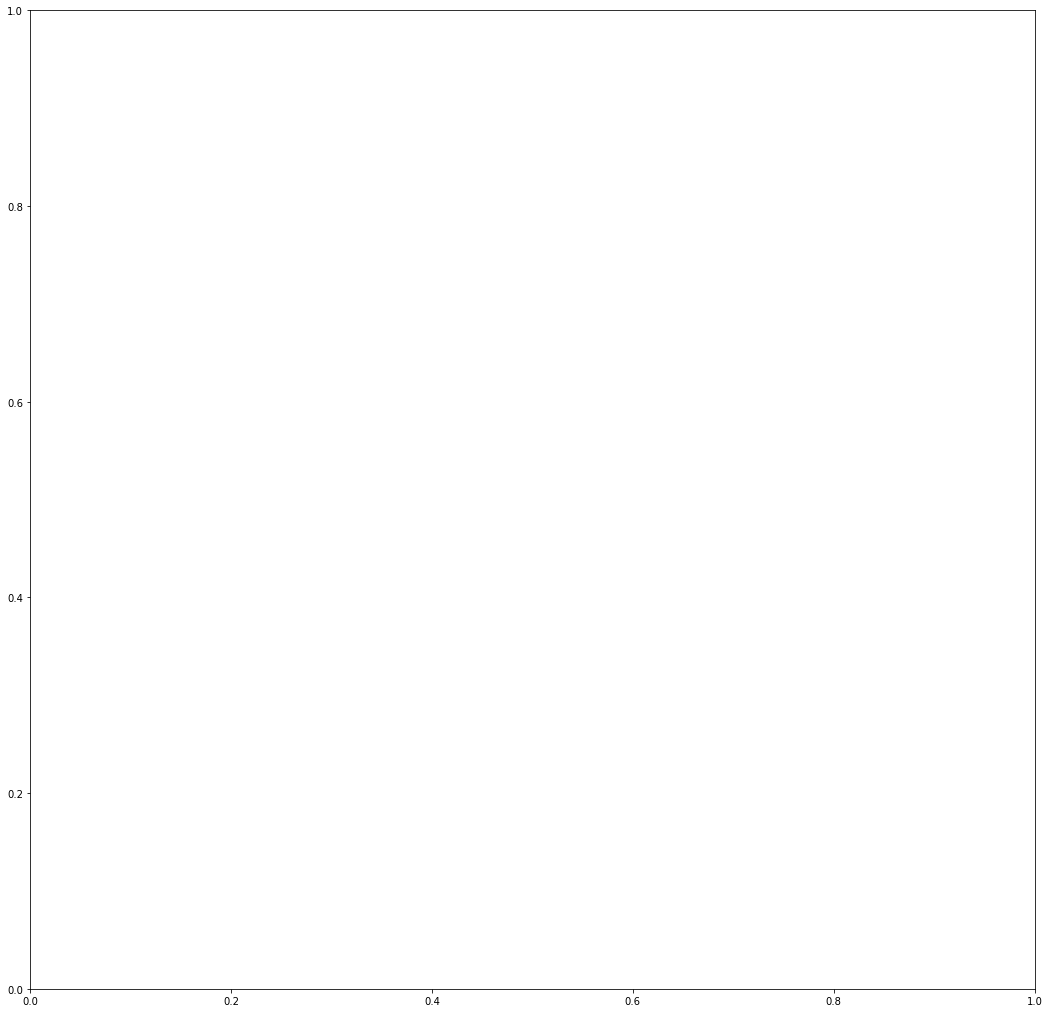

In [78]:
#figur = plt.figure(figsize=(19,19))
fig = plt.figure(figsize=[18, 18])
ax = fig.add_subplot(111)

In [79]:
display = pyart.graph.RadarMapDisplay(radar)


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/pmccrone/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:2320: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.float(self.globe.semimajor_axis or WGS84_SEMIMAJOR_AXIS)
/home/pmccrone/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:2321: DeprecationWarning: `np.float` is a deprecat

In [80]:
GIS_shapefile = '/satdat/m4b/NEXRAD/python/shape/cb_2015_us_state_500k'


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0], \
    central_longitude=radar.longitude['data'][0])

/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
#fig = plt.figure(figsize=(19,19))


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


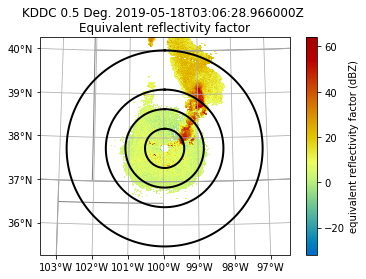

In [83]:
display.plot_ppi_map('reflectivity', 1, vmin=-32, vmax=64, min_lon=minlon, max_lon=maxlon, \
    min_lat=minlat, max_lat=maxlat, fig=fig, ax=ax, \
    lat_lines = local_lats, lon_lines = local_lons, \
    projection=projection, \
    lat_0=radar.latitude['data'][0],lon_0=radar.longitude['data'][0])
#
#display.plot_ppi_map('reflectivity', 1, vmin=-32, vmax=64, min_lon=minlon, max_lon=maxlon, \
#    min_lat=minlat, max_lat=maxlat, \
#    lat_lines = local_lats, lon_lines = local_lons, \
#    shapefile=GIS_shapefile, \
#    projection=projection, \
#    lat_0=radar.latitude['data'][0],lon_0=radar.longitude['data'][0])

display.plot_range_rings([50, 100, 150, 250])


/home/pmccrone/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


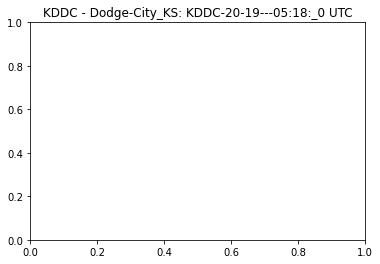

In [51]:
#
fileformat='.jpg'
#
JPEG_file_data='nexrad_'+CALL_SIGN+'_'+yymmdd+'_'+hhmmss+'_'+'UTC_Base_REF'
#
TITLE_TEXT_1='NEXRAD Reflectivity '
#
TITLE_TEXT_2=CALL_SIGN+' - '+PlaceName
#
plt.title(TITLE_TEXT_2+': '+ymdhms_formatted)
#
JPEG_dir='/home/pmccrone/data/GIS/graphics/'
JPEG_filename=JPEG_dir+JPEG_file_data+fileformat
#
plt.savefig(JPEG_filename)